# Internship Assignment: for #Primetrade.ai


Submitted By, Anushka Roy



#Objective:

➔Explore the relationship between trader performance and Bitcoin market sentiment

➔Uncover patterns to guide smarter trading strategies based on historical data.

In [1]:
import pandas as pd
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

In [2]:
print("Sentiment Dataset:")
display(sentiment_df.head())

print("\nTrader Dataset:")
display(trader_df.head())

# Check data types and missing values
print("\nSentiment Data Info:")
print(sentiment_df.info())

print("\nTrader Data Info:")
print(trader_df.info())

Sentiment Dataset:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Dataset:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null

In [3]:

# Convert date to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Drop duplicates
sentiment_df.drop_duplicates(inplace=True)

# Previewing clean sentiment data
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
# Convert 'Timestamp IST' to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'])

# Create a 'date' column (only date part)
trader_df['date'] = trader_df['Timestamp IST'].dt.date

#convert it to datetime (to match sentiment)
trader_df['date'] = pd.to_datetime(trader_df['date'])

# Check for missing values
print(trader_df.isnull().sum())


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64


In [5]:
# Group trader data by date
daily_trader_stats = trader_df.groupby('date').agg(
    total_trades=('Order ID', 'count'),
    total_closed_pnl=('Closed PnL', 'sum'),
    avg_closed_pnl=('Closed PnL', 'mean'),
    total_volume_usd=('Size USD', 'sum')
).reset_index()

daily_trader_stats.head()


,date,total_trades,total_closed_pnl,avg_closed_pnl,total_volume_usd
0,2023-01-05,3,0.000000,0.000000,477.00
1,2023-05-12,9,0.000000,0.000000,50005.83
2,2023-12-14,11,-205.434737,-18.675885,113203.35
3,2023-12-15,2,-24.632034,-12.316017,10609.95
4,2023-12-16,3,0.000000,0.000000,15348.77


In [6]:
# Merge with sentiment data
merged_df = pd.merge(daily_trader_stats, sentiment_df[['date', 'classification']], on='date', how='inner')

# Preview merged data
merged_df.head()


,date,total_trades,total_closed_pnl,avg_closed_pnl,total_volume_usd,classification
0,2023-01-05,3,0.000000,0.000000,477.00,Fear
1,2023-05-12,9,0.000000,0.000000,50005.83,Neutral
2,2023-12-14,11,-205.434737,-18.675885,113203.35,Greed
3,2023-12-15,2,-24.632034,-12.316017,10609.95,Greed
4,2023-12-16,3,0.000000,0.000000,15348.77,Greed


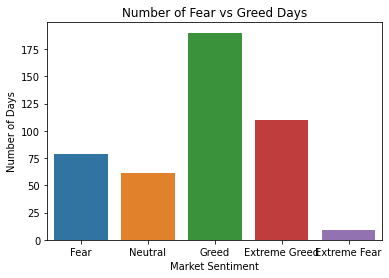

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of sentiment days
sns.countplot(data=merged_df, x='classification')
plt.title('Number of Fear vs Greed Days')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Days')
plt.show()


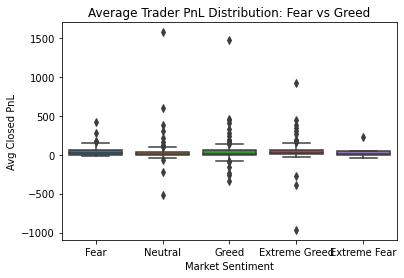

In [8]:
# Average closed PnL by sentiment
sns.boxplot(data=merged_df, x='classification', y='avg_closed_pnl')
plt.title('Average Trader PnL Distribution: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.show()


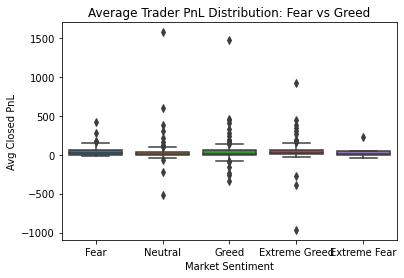

In [9]:
# Average closed PnL by sentiment
sns.boxplot(data=merged_df, x='classification', y='avg_closed_pnl')
plt.title('Average Trader PnL Distribution: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.show()


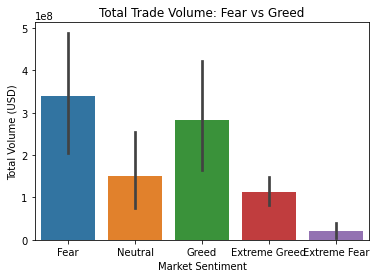

In [10]:
# Total trading volume (USD) by sentiment
sns.barplot(data=merged_df, x='classification', y='total_volume_usd', estimator=sum)
plt.title('Total Trade Volume: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.show()


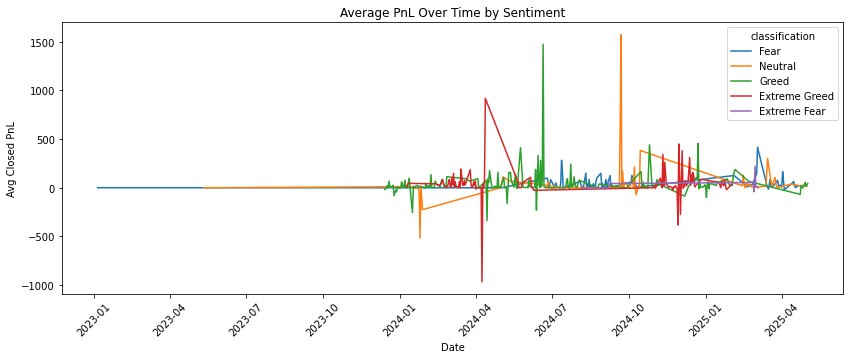

In [11]:
# PnL trend over time
plt.figure(figsize=(14,5))
sns.lineplot(data=merged_df, x='date', y='avg_closed_pnl', hue='classification')
plt.title('Average PnL Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Avg Closed PnL')
plt.xticks(rotation=45)
plt.show()


# REPORT SECTION: Insights from Visualizations on Sentiment vs Trader Performance

I. Market Sentiment Frequency

1) Visualization: 

➜Number of Fear vs Greed Days (Bar chart)

2) Insight:

➜The market spent the most days in "Greed".
➜"Extreme Fear" occurred least frequently.

3) Observation:

➜The tallest bar is labeled "Greed", indicating the highest count of days.
➜Bars for "Fear" and "Extreme Greed" are moderately tall.
➜"Extreme Fear" has a significantly shorter bar, confirming low frequency.

II. Trader PnL Distribution by Sentiment

1) Visualization:

➜Average Trader PnL Distribution: Fear vs Greed (Boxplot)

2) Insight:

➜Median PnL values were relatively stable across sentiments.
➜Wider spread and outliers were more noticeable in Greed and Extreme Greed, indicating both high profits and large losses.

3) Observation:

➜Boxes (IQR) are narrow and similar in height, suggesting stable medians.
➜Whiskers and dots (outliers) are more spread out for Greed and Extreme Greed.
➜Extreme Fear has narrower spread, implying less variance.

III. Total Trade Volume by Sentiment

1) Visualization:

➜Total Trade Volume: Fear vs Greed (Bar chart with error bars)

2) Insight:

➜Highest total trade volume occurred during Fear.
➜Volume dropped significantly in Extreme Fear and Extreme Greed.

3) Observation:

➜"Fear" bar is tallest (≈ 3.5e8), even taller than Greed.
➜"Extreme Fear" and "Extreme Greed" bars are short, indicating low volume.
➜Error bars suggest high variance in trade volume during Greed and Fear.